In [28]:
import pandas as pd
import numpy as np
import seaborn as sns #Importing required packages

In [29]:
data = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataKPCA.csv') #Loading the data

In [30]:
data #Checking with the loaded data set

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540
...,...,...,...,...,...,...,...
185,2.647090,14.246231,-44.947807,-10.412540,-2.809695,2.084152,1.903990
186,2.677908,14.620351,-45.776334,-10.196029,-2.640178,2.038005,1.910832
187,3.543866,14.487241,-49.692284,-7.773038,-1.865513,1.752195,1.952922
188,3.563404,13.945495,-49.131439,-8.156546,-2.104684,1.773425,1.914397


In [31]:
data.describe() #Features or characteristic of data

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3.121555,14.985682,-47.909555,-8.811677,-2.175834,1.893953,1.958302
std,0.589013,1.298751,2.459375,2.337179,0.505819,0.159647,0.108756
min,1.964315,11.577329,-52.837231,-14.068488,-3.613443,1.750006,1.761394
25%,2.679532,14.087484,-49.736194,-10.392405,-2.512570,1.773690,1.880257
50%,3.039420,14.943396,-48.185549,-9.045948,-2.156469,1.852369,1.942348
75%,3.489341,15.764749,-46.405402,-7.235609,-1.828925,1.954614,2.018826
max,4.820967,18.747792,-40.772554,-1.907331,-0.972995,2.580983,2.332842


In [32]:
data.corr() #Correlation matrix of the data set

,x1,x2,x3,x4,x5,x6,x7
x1,1.000000,-0.192768,-0.815308,0.924728,0.444921,-0.617167,-0.567600
x2,-0.192768,1.000000,-0.333149,0.028781,0.699611,-0.178769,0.564269
x3,-0.815308,-0.333149,1.000000,-0.862548,-0.831090,0.828093,0.204812
x4,0.924728,0.028781,-0.862548,1.000000,0.520445,-0.633372,-0.603537
x5,0.444921,0.699611,-0.831090,0.520445,1.000000,-0.737043,0.330256
x6,-0.617167,-0.178769,0.828093,-0.633372,-0.737043,1.000000,0.034170
x7,-0.567600,0.564269,0.204812,-0.603537,0.330256,0.034170,1.000000


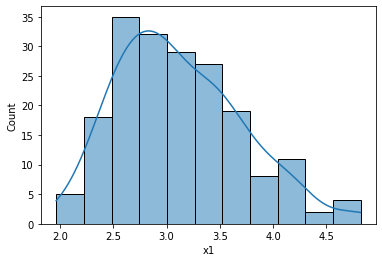

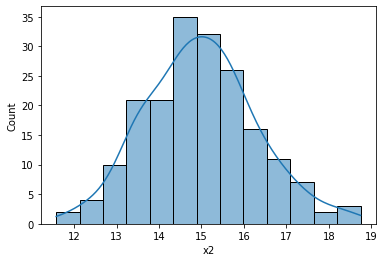

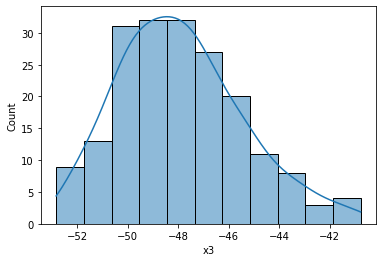

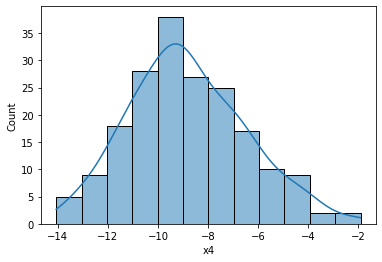

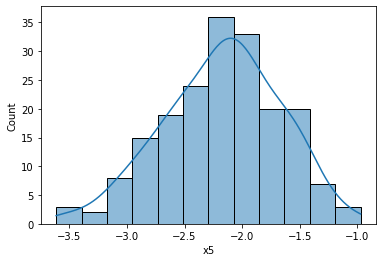

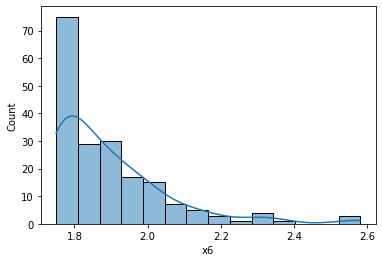

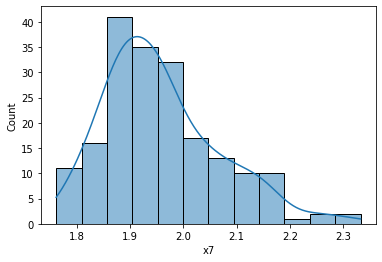

In [33]:
import matplotlib.pyplot as plt # For plotting the plots
for column in data.columns.values:
  sns.histplot(data[column],kde=True) #For plotting histogram, kde will estimate the data distribution as a smooth curve
  plt.show()

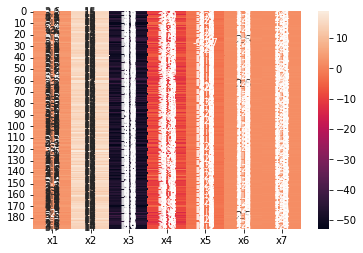

In [34]:
sns.heatmap(data, annot = True) #For plotting the heatmap

In [35]:
from sklearn.preprocessing import StandardScaler #For standardizing th e data
scaled_data = StandardScaler().fit_transform(data) #Fitting and transforming the data by standard scaler
scaled_data #The data obtained after scaling

array([[-0.89353091,  0.21422802,  0.66042339, ..., -0.1801732 ,
         0.26302041,  0.75031082],
       [-0.04301419, -0.15508087, -0.10846747, ..., -0.08927182,
        -0.26849909, -0.33491828],
       [ 0.40630971, -0.16271138, -0.63691522, ...,  0.82338803,
        -0.88452044,  0.77101109],
       ...,
       [ 0.71887615, -0.38479911, -0.72678584, ...,  0.61512483,
        -0.8902921 , -0.04960267],
       [ 0.75213495, -0.80302959, -0.49813955, ...,  0.14103532,
        -0.75695819, -0.40477201],
       [ 1.01639752, -0.90700998, -0.61371353, ...,  0.04316081,
        -0.75400694, -0.52745531]])

In [36]:
scaled_data = pd.DataFrame(scaled_data,columns = data.columns.values)
#COnverting the data into dataframe

In [37]:
scaled_data #New standardized dataframe

,x1,x2,x3,x4,x5,x6,x7
0,-0.893531,0.214228,0.660423,-0.935894,-0.180173,0.263020,0.750311
1,-0.043014,-0.155081,-0.108467,0.005283,-0.089272,-0.268499,-0.334918
2,0.406310,-0.162711,-0.636915,-0.093875,0.823388,-0.884520,0.771011
3,-1.543484,0.032201,1.919837,-2.039160,-0.926059,1.924996,1.692138
4,0.471557,0.100418,-0.614413,0.838262,0.297131,-0.664890,-0.762999
...,...,...,...,...,...,...,...
185,-0.807654,-0.570860,1.207451,-0.686765,-1.256448,1.194522,-0.500716
186,-0.755195,-0.282037,0.869675,-0.593882,-0.920429,0.904699,-0.437642
187,0.718876,-0.384799,-0.726786,0.445573,0.615125,-0.890292,-0.049603
188,0.752135,-0.803030,-0.498140,0.281049,0.141035,-0.756958,-0.404772


#b.

In [38]:
from sklearn.decomposition import KernelPCA as KPCA #For Applying Kernel pca technique
KPCA_transformer = KPCA( kernel='rbf') #Defining the KPCA transformer
data_transformed = KPCA_transformer.fit_transform(scaled_data) #Fitting the standardized data into KPCA transformer
data_transformed.shape

(190, 189)

In [39]:
var_explained = np.var(data_transformed,axis=0) #Accessing the variance explained for the transformed data

#c.

In [40]:
Var_Explained = [] #Empty list for storing variance explained
Components = [] #For storing corresponding number of components
for i in range(1,11): # We have to plot upto 10 dimensions
  KPCA_transformer = KPCA(n_components = i, kernel='rbf') #Defining the KPCA_transformer for each number of components
  data_transformed = KPCA_transformer.fit_transform(scaled_data) # Fitting and transforming the data into the above function
  var_explained = np.var(data_transformed) # For calling the variance explained
  Var_Explained.append(var_explained) #Appending the variance explained into the list
  Components.append(i) #For appending corresponding number of components into list

In [41]:
Var_Explained #List of variance explained

[0.14807904143184933,
 0.12719557629552075,
 0.11798886882083892,
 0.09994118729980996,
 0.08848958312694585,
 0.0794557276611504,
 0.07226653450229416,
 0.06579115972466189,
 0.06032510754015689,
 0.05572705608481074]

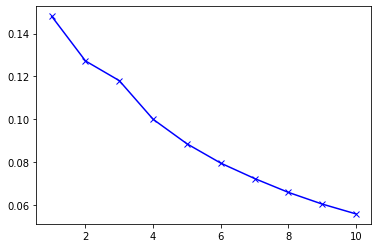

In [42]:
import matplotlib.pyplot as plt
plt.plot(Components,Var_Explained,'bx-') #Plotting the variance explaijned vs no. of components plot
plt.show() # Showing the plot

Discussed with:
Rupesh Yadav(21i190004)


Abhishek Gupta(21i190005)

References:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

https://www.researchgate.net/figure/The-cumulative-explained-variance-of-PCA-SVD-and-KPCA-techniques-a-and-b_fig6_340160854

